<h1>Sentiment Analysis for Financial News</h1>
"The objective of the phrase level annotation task was to classify each example sentence into a positive, negative or neutral category by considering only the information explicitly available in the given sentence.<br> Since the study is focused only on financial and economic domains, the annotators were asked to consider the sentences from the view point of an investor only; i.e. whether the news may have positive, negative or neutral influence on the stock price. As a result, sentences which have a sentiment that is not relevant from an economic or financial perspective are considered neutral."
<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("all-data.csv", encoding="ISO-8859-1", names=['Sentiment', 'FinancialNews'])

Reading in the DataFrame

In [3]:
df.head()

,Sentiment,FinancialNews
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   FinancialNews  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


We have no null values

In [5]:
df[df.duplicated()]

,Sentiment,FinancialNews
1099,neutral,The issuer is solely responsible for the conte...
1416,neutral,The report profiles 614 companies including ma...
2396,neutral,Ahlstrom 's share is quoted on the NASDAQ OMX ...
2567,neutral,SSH Communications Security Corporation is hea...
3094,neutral,Proha Plc ( Euronext :7327 ) announced today (...
3206,neutral,The company serves customers in various indust...


In [6]:
df[df.FinancialNews=='The issuer is solely responsible for the content of this announcement .']

,Sentiment,FinancialNews
1098,neutral,The issuer is solely responsible for the conte...
1099,neutral,The issuer is solely responsible for the conte...


Our dataframe has duplicated values, we need to work on this.

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df[df.duplicated()]

,Sentiment,FinancialNews


I dropped the duplicates and I kept only the first occurence.<br>
Our dataframe no longer has duplicates.

# EDA!!

<AxesSubplot:title={'center':'Financial News Sentiment'}, ylabel='Sentiment'>

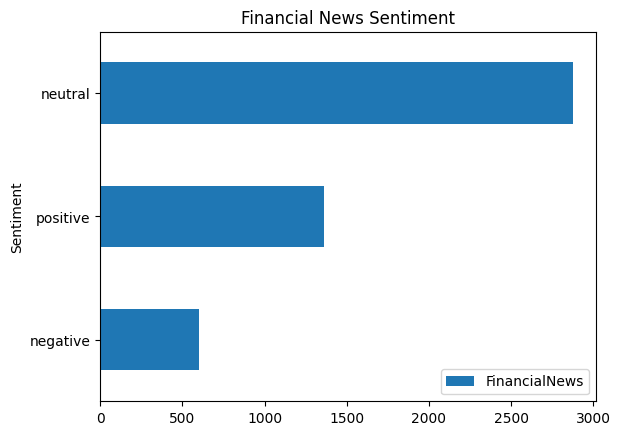

In [9]:
df.groupby('Sentiment').count().sort_values(by='FinancialNews').plot(kind='barh', title='Financial News Sentiment')

Clearly our dataset is imbalanced.<br>
Random under sampling and random over sampling are the two common ways of dealing with an imbalanced dataset.<br>
However I will not be using any of these methods, rather I will use the right evaluation metrics

<i>Applying inappropriate evaluation metrics for model generated using imbalanced data can be dangerous.<br> Imagine our training data is the one illustrated in graph above. If accuracy is used to measure the goodness of a model, a model which classifies all testing samples into “0” will have an excellent accuracy (99.8%), but obviously, this model won’t provide any valuable information for us.</i>

<i>In this case, other alternative evaluation metrics can be applied such as:</i>


<i><li>Precision/Specificity: how many selected instances are relevant.</li></i>
<i><li>Recall/Sensitivity: how many relevant instances are selected.</li></i>
<i><li>F1 score: harmonic mean of precision and recall.</li></i>
<i><li>MCC: correlation coefficient between the observed and predicted binary classifications.</li></i>
<i><li>AUC: relation between true-positive rate and false positive rate.</li></i>
https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

In [10]:
df.describe()

,Sentiment,FinancialNews
count,4840,4840
unique,3,4838
top,neutral,The Group 's business is balanced by its broad...
freq,2873,2


In [11]:
df.Sentiment.value_counts()

neutral     2873
positive    1363
negative     604
Name: Sentiment, dtype: int64

# Feature Engineering

We need to convert our target variable(Sentiment) into integers.<br>
The FinancialNews column also needs to be in appropriate form for our model.  We will deal with the FinancialColumn when building the model.

In [12]:
df['SentimentInteger'] = df.Sentiment.map({
    'negative': 0,
    'positive': 1,
    'neutral': 2
    
})

In [13]:
df.head()

,Sentiment,FinancialNews,SentimentInteger
0,neutral,"According to Gran , the company has no plans t...",2
1,neutral,Technopolis plans to develop in stages an area...,2
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,1
4,positive,According to the company 's updated strategy f...,1


In [14]:
df.tail()

,Sentiment,FinancialNews,SentimentInteger
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,2
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0
4845,negative,Sales in Finland decreased by 10.5 % in Januar...,0


# Model Building

We will use the TF-IDF for converting the FinancialNews column into a vector of numbers.<br>
We will then use various classification algorithms.

<i>TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction.</i><br>
https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
v = TfidfVectorizer()
transform_output = v.fit_transform(df.FinancialNews)

In [17]:
from sklearn.linear_model import LogisticRegression

We will use the K-Fold Cross Validation method to find the best model.

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
import numpy as np

In [20]:
np.mean(cross_val_score(LogisticRegression(), transform_output, df.SentimentInteger))

0.7018595041322314

In [21]:
np.mean(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), transform_output, df.SentimentInteger))

0.6913223140495869

In [22]:
np.mean(cross_val_score(LogisticRegression(C=100,solver='liblinear',multi_class='ovr'), transform_output, df.SentimentInteger))

0.715702479338843

In [23]:
np.mean(cross_val_score(LogisticRegression(C=10,solver='liblinear',multi_class='ovr'), transform_output, df.SentimentInteger))

0.7200413223140496

In [24]:
np.mean(cross_val_score(LogisticRegression(C=10,penalty='l1',solver='liblinear',multi_class='ovr'), transform_output, df.SentimentInteger))

0.7192148760330579

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
np.mean(cross_val_score(RandomForestClassifier(), transform_output, df.SentimentInteger))

0.6787190082644627

In [27]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators=40), transform_output, df.SentimentInteger))

0.6733471074380164

In [28]:
np.mean(cross_val_score(RandomForestClassifier(n_estimators=100), transform_output, df.SentimentInteger))

0.678099173553719

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
np.mean(cross_val_score(MultinomialNB(), transform_output, df.SentimentInteger))

0.6485537190082644

In [31]:
from sklearn.svm import SVC

In [32]:
np.mean(cross_val_score(SVC(), transform_output, df.SentimentInteger))

0.693595041322314

In [33]:
np.mean(cross_val_score(SVC(gamma='auto'), transform_output, df.SentimentInteger))

0.593595041322314

The Logistic Regression model is the model with the better accuracy so we will use that

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.FinancialNews, df.SentimentInteger, test_size=0.2)

In [38]:
lr = Pipeline([
    ('Vectorizer', TfidfVectorizer()),
    ('Logistic Regression', LogisticRegression(C=10,solver='liblinear',multi_class='ovr'))
])

We use sklearn's Pipeline to first convert our text input into a vector of numbers.<br>
After that we use the Logistic Regression model to train our model.

In [39]:
lr.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', TfidfVectorizer()),
                ('Logistic Regression',
                 LogisticRegression(C=10, multi_class='ovr',
                                    solver='liblinear'))])

In [40]:
y_pred = lr.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.55      0.65       127
           1       0.72      0.60      0.66       273
           2       0.79      0.90      0.84       568

    accuracy                           0.77       968
   macro avg       0.77      0.69      0.72       968
weighted avg       0.77      0.77      0.76       968



We use the classification report metric to evaluate our model's performance on every predicted class.
Let's start by defining the terms that we are seeing on our classification report.<br>

<i>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.<i>

<i>The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.</i>
    
<i>The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.</i>
    
<i>The support is the number of occurrences of each class in y_true.</i>
    
From the definition of terms, starting with precision, we can infer that precision measures the percentage of correct positive predictions relative to total positive predictions.
    
<b>Class 0 (negative class)</b> has been correctly predicted 79% of the times.<br>
<b>Class 1 (positive class)</b> has been correctly predicted 72% of the times.<br>
<b>Class 2 (neutral class)</b> has been correctly predicted 79% of the times
    
For all the financial headlines predicted to be in their corresponding classes, the model is performing well in correctly predicting these classes
    
    
On to the recall, this is the percentage of correct positive predictions relative to total actual positives.<br>
<b>Class 0 </b> Out of all negative financial headlines, the model predicted this outcome correctly 55%.<br>
<b>Class 1</b> Out of all positive financial headlines, the model predicted this outcome correctly 60%.<br>
<b>Class 2</b> Out of all neutral financial headlines, the model predicted this outcome correctly 90%<br>
The negative class performed badly here.<br>
f1 score is a weighted harmonic mean of precision and recall.  The closer to 1, the better the model.<br>

<b>Class 0 (negative class)</b> 0.65 f1 score.<br>
<b>Class 1 (positive class)</b> 0.66 f1 score<br>
<b>Class 2 (neutral class)</b> 0.84 f1 score<br>

Note that during our EDA, our negative samples were few and we thought that this will affect the model's performance.<br>
From the classification report on the f1 score we can see that there is a major difference on the predicted classes, therefore we can conclude that in this case having an imbalanced dataset negatively affected the performance of the model.<br>.
    
The model performed well on the neutral class but not so much on the negative and positive classes.
    
Support: These values simply tell us how many financial news headlines belonged to each class in the test dataset.

In [42]:
import pickle

In [43]:
with open('financial_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

Saving the model using pickle